In [1]:
import xgboost, lightgbm

In [2]:
import keras

Using TensorFlow backend.


In [3]:
!vw --version

8.3.2


In [4]:
%load_ext watermark
%watermark -v -m -p numpy,scipy,pandas,matplotlib,sklearn 

CPython 3.5.2
IPython 5.3.0

numpy 1.12.1
scipy 0.19.0
pandas 0.19.2
matplotlib 2.0.0
sklearn 0.18.1

compiler   : GCC 5.4.0 20160609
system     : Linux
release    : 4.9.13-moby
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


In [5]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

In [6]:
import time
from tqdm import tqdm_notebook
for i in tqdm_notebook(range(100)):
    time.sleep(0.05)

Widget Javascript not detected.  It may not be installed or enabled properly.


In [7]:
X, Y = datasets.make_classification(10000, 30)
pd.DataFrame(X).head(5)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.074328,-1.115092,2.027062,-0.134142,-0.518887,0.302616,-0.193959,-1.074473,0.779969,1.185224,...,-0.949554,0.019786,-2.387889,1.624363,0.516348,1.228524,0.046311,-0.785742,0.450605,0.548390
1,-0.521049,1.161237,-0.037720,0.565458,0.545896,-1.378488,1.078203,-0.952323,-0.753114,1.160114,...,0.494468,-1.322054,0.419597,0.011233,-0.411512,0.951589,0.742394,0.398281,0.649214,-0.550771
2,-1.259291,0.160987,-0.312389,0.244061,0.611524,0.918271,0.455367,-0.602589,-0.671962,0.788968,...,-1.389355,1.699387,-0.803740,0.823745,-1.314579,-1.154292,-0.287189,1.982463,-0.515677,-0.141893
3,1.157270,-0.329808,-0.195782,-1.446747,-0.573041,-0.377221,-0.479940,0.744432,-1.020537,-0.667856,...,0.062299,1.138880,-0.874381,0.023135,-1.398540,-0.454838,-0.133668,0.097147,-0.201890,0.855246
4,0.507383,0.384731,-0.907144,1.035555,-0.060606,2.450749,1.027166,-0.098693,-0.577869,2.107642,...,1.425610,0.985390,-0.422342,0.141064,-0.329048,-0.623154,2.362511,1.556701,0.411348,-0.063244


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y)
clsf = xgboost.XGBClassifier(n_estimators=200)
clsf.fit(X_train, y_train)
prediction = clsf.predict_proba(X_test)

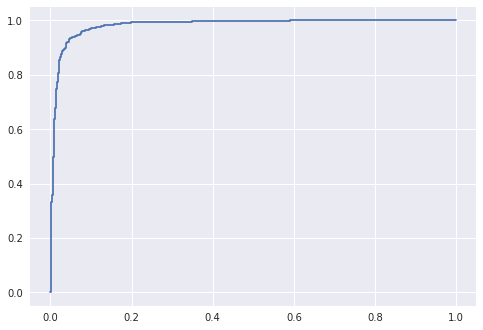

In [9]:
fpr, tpr, _ = roc_curve(y_test, prediction[:,1])
plt.plot(fpr, tpr);